### Visualizations I

-----
**OBJECTIVES**

- Introduce basic `matplotlib` syntax and concepts
- Understand `figure` and `axes` objects in matplotlib
- Use `seaborn` for basic univariate, bivariate, and multivariate data visualization
- Use `bokeh` for basic visualizations
- Use `ipywidgets` to develop interactive visualizations
-----



In [1]:
#in a terminal for installation
#pip install bokeh
#pip install ipywidgets

#Maybe you'll have to also do:
#conda install -n base -c conda-forge jupyterlab_widgets
#conda install -n py36 -c conda-forge ipywidgets

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [3]:
penguins = sns.load_dataset('penguins')
tips = sns.load_dataset('tips')
titanic = sns.load_dataset('titanic')

In [4]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [5]:
penguins = penguins.dropna()

In [6]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [7]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


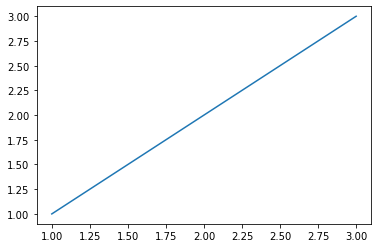

In [8]:
plt.plot([1, 2, 3], [1, 2, 3])

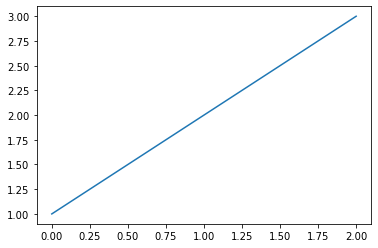

In [9]:
plt.plot([1, 2, 3])

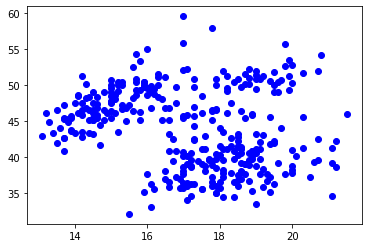

In [11]:
plt.plot(penguins['bill_depth_mm'], penguins['bill_length_mm'], 'bo')

- `plt.scatter()`
- `plt.hist()`
- `plt.bar()`

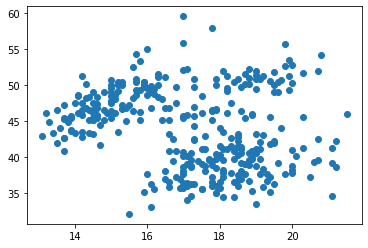

In [12]:
plt.scatter(penguins['bill_depth_mm'], penguins['bill_length_mm'])

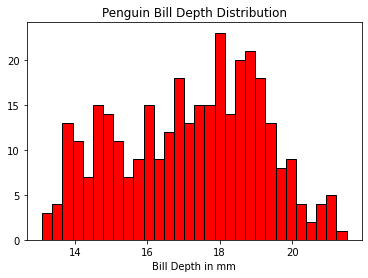

In [19]:
plt.hist(penguins['bill_depth_mm'], bins = 30, edgecolor = 'black', color = 'red')
plt.xlabel('Bill Depth in mm')
plt.title("Penguin Bill Depth Distribution");

In [20]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [22]:
type(penguins['species'].value_counts())

pandas.core.series.Series

In [23]:
species_count = penguins['species'].value_counts()

In [24]:
species_count.index

Index(['Adelie', 'Gentoo', 'Chinstrap'], dtype='object')

In [25]:
species_count.values

array([146, 119,  68])

<BarContainer object of 3 artists>

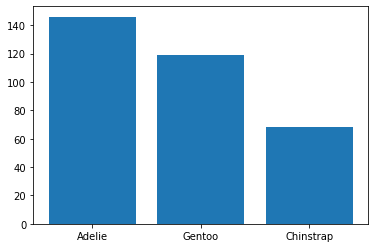

In [26]:
plt.bar(species_count.index, species_count.values)

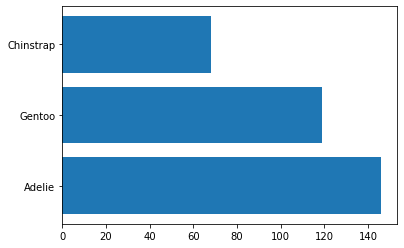

In [28]:
plt.barh(species_count.index, species_count.values);

### Figure and Axes Objects -- Making Subplots

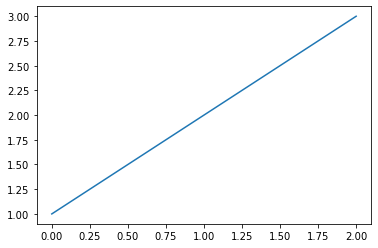

In [29]:
fig, ax = plt.subplots()
ax.plot([1, 2, 3])

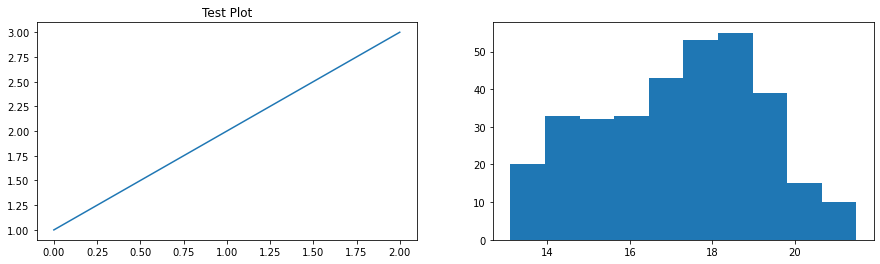

In [35]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 4))

ax[0].plot([1, 2, 3])
ax[0].set_title('Test Plot')

ax[1].hist(penguins['bill_depth_mm']);

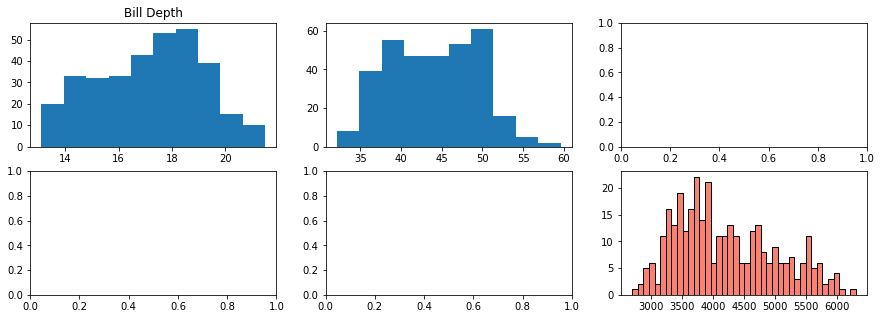

In [45]:
fig, ax = plt.subplots(2, 3, figsize = (15, 5))
ax[0, 0].hist(penguins['bill_depth_mm'])
ax[0, 0].set_title('Bill Depth')

ax[0, 1].hist(penguins['bill_length_mm']);

ax[1, 2].hist(penguins['body_mass_g'], color = 'salmon', edgecolor = 'black', bins = 40);
plt.savefig('6_subplots.png')

### Plotting From a DataFrame

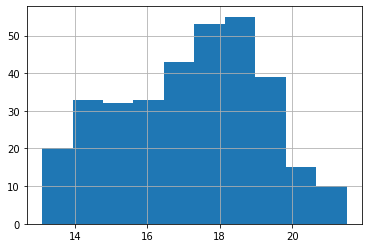

In [46]:
#plt.hist(penguins['bill_depth_mm'])
penguins['bill_depth_mm'].hist();

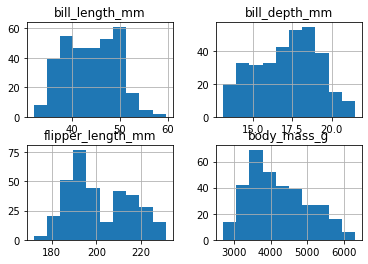

In [47]:
penguins.hist();

### `seaborn`

- `countplot`
- `displot`
- `two variable`

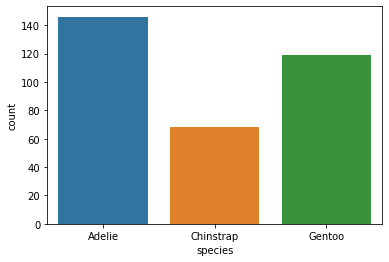

In [49]:
sns.countplot(data = penguins, x = 'species');

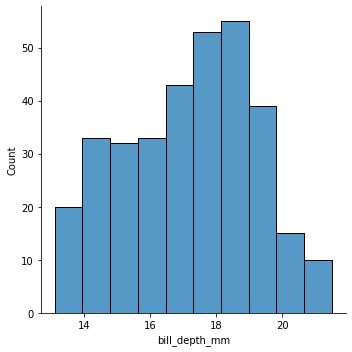

In [51]:
sns.displot(data = penguins, x = 'bill_depth_mm');

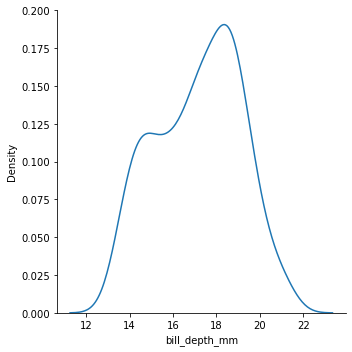

In [52]:
sns.displot(data = penguins, x = 'bill_depth_mm', kind = 'kde');

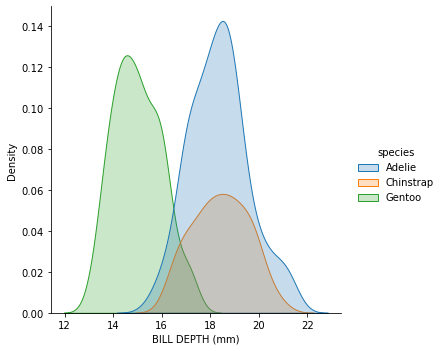

In [55]:
sns.displot(data = penguins, x = 'bill_depth_mm',  hue = 'species', kind = 'kde', fill = True)
plt.xlabel('BILL DEPTH (mm)');

<AxesSubplot:xlabel='body_mass_g', ylabel='Count'>

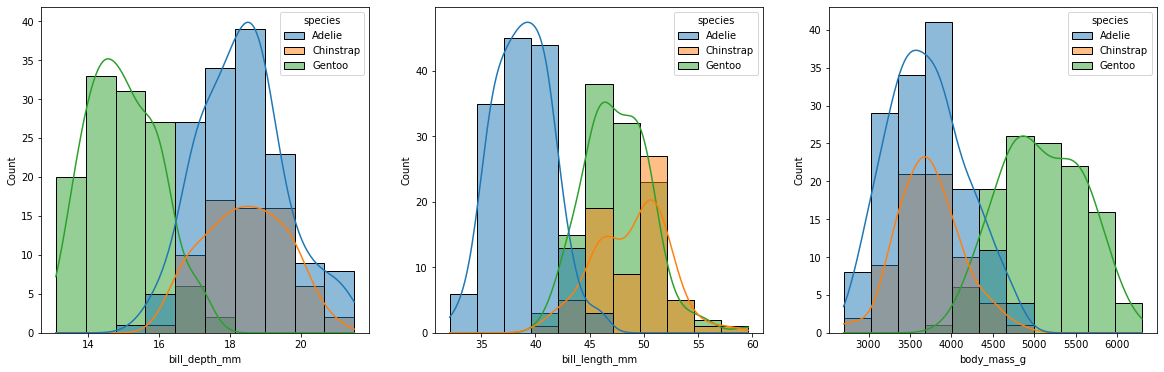

In [60]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 6))

sns.histplot(data = penguins, x = 'bill_depth_mm', ax = ax[0], kde = True, hue = 'species', fill = True)

sns.histplot(data = penguins, x = 'bill_length_mm', ax = ax[1], kde = True, hue = 'species', fill = True)

sns.histplot(data = penguins, x = 'body_mass_g', ax = ax[2], kde = True, hue = 'species', fill = True)

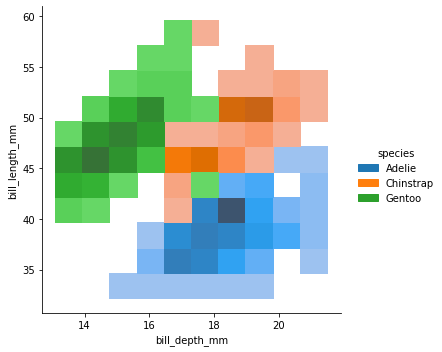

In [62]:
sns.displot(data = penguins, x = 'bill_depth_mm', y = 'bill_length_mm', hue = 'species')

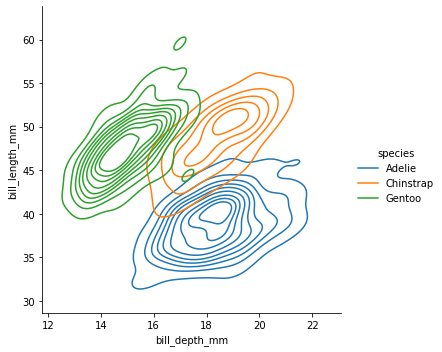

In [63]:
sns.displot(data = penguins, x = 'bill_depth_mm', y = 'bill_length_mm', hue = 'species', kind = 'kde')

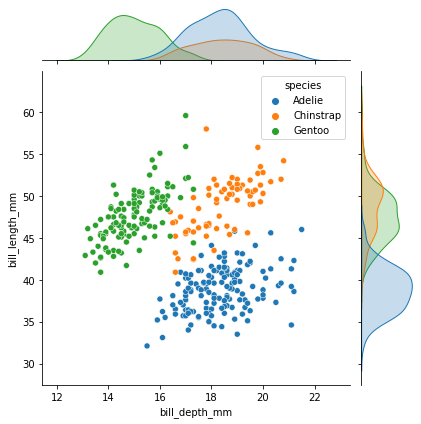

In [64]:
sns.jointplot(data = penguins, x = 'bill_depth_mm', y = 'bill_length_mm', hue = 'species')

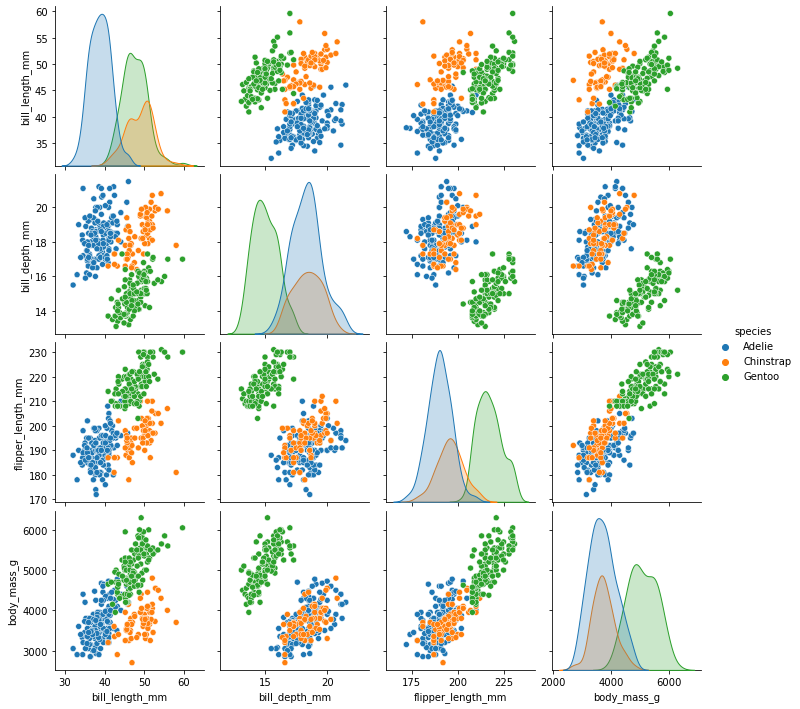

In [66]:
sns.pairplot(penguins, hue = 'species')

In [68]:
#sns.pairplot?

### Widgets!!!


[Documentation](https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html)



In [69]:
from ipywidgets import interact
import ipywidgets as widgets

In [70]:
def f(x): return x**2

In [74]:
interact(f, x = widgets.FloatSlider(value = 0, min = - 2, max = 2, step = 0.1))

interactive(children=(FloatSlider(value=0.0, description='x', max=2.0, min=-2.0), Output()), _dom_classes=('wi…

<function __main__.f(x)>

In [79]:
def N(n): return sns.displot(np.random.normal(size = n))

In [80]:
interact(N, n = widgets.IntSlider(min = 1, max = 1000, step = 10) )

interactive(children=(IntSlider(value=1, description='n', max=1000, min=1, step=10), Output()), _dom_classes=(…

<function __main__.N(n)>

### `bokeh`

In [81]:
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [86]:
p = figure()
p.circle([1, 2, 3], [6, 2, 4], size = 20, color = 'red')
p.triangle([4, 5], [4, 4], size = 20, color = 'blue')
show(p)

In [87]:
p = figure()
p.circle(penguins['bill_depth_mm'], penguins['bill_length_mm'])
show(p)